In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2021-06-30 10:53:56.626071: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-30 10:53:56.626125: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
import pandas
tweets=pd.read_csv("/Users/acer/Sandesh Pal/Sandesh Pal Data Science Assignment/Text Mining/Tweets.txt",error_bad_lines=False, sep=';')

In [7]:
tweets


,X
0,"234 tweets with ""loser"" I feel sorry for Rosi..."
1,"tweets with ""dumb"" or ""dummy"" You must admit t..."
2,"204 tweets with ""terrible"" I loved beating the..."
3,"183 tweets with ""stupid"" @michellemalkin You w..."
4,.
5,"156 tweets with ""weak"" There is no longer a Be..."
6,.
7,"117 tweets with ""dope"" or ""dopey"" Dopey @Lor..."
8,.
9,"115 tweets with ""dishonest"" A dishonest slob o..."


In [8]:
tweets = [X.strip() for X in tweets.X] # remove both the leading and the trailing characters
tweets = [X for X in tweets if X] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['234 tweets with "loser"  I feel sorry for Rosie \'s new partner in love whose parents are devastated at the thought of their daughter being with @Rosie--a true loser. — Donald J. Trump (@realDonaldTrump) December 14, 2011 222.',
 'tweets with "dumb" or "dummy" You must admit that Bryant Gumbel is one of the dumbest racists around - an arrogant dope with no talent. Failed at CBS etc-why still on TV? — Donald J. Trump (@realDonaldTrump) August 21, 2013 .',
 '204 tweets with "terrible" I loved beating these two terrible human beings. I would never recommend that anyone use her lawyer, he is a total loser! — Donald J. Trump (@realDonaldTrump) May 23, 2013 .',
 '183 tweets with "stupid" @michellemalkin You were born stupid! — Donald J. Trump (@realDonaldTrump) March 22, 2013',
 '.',
 '156 tweets with "weak" There is no longer a Bernie Sanders "political revolution." He is turning out to be a weak and somewhat pathetic figure,wants it all to end! — Donald J. Trump (@realDonaldTrump) July 2

In [9]:
# Joining the list into one string/text
text = ' '.join(tweets)
text

'234 tweets with "loser"  I feel sorry for Rosie \'s new partner in love whose parents are devastated at the thought of their daughter being with @Rosie--a true loser. — Donald J. Trump (@realDonaldTrump) December 14, 2011 222. tweets with "dumb" or "dummy" You must admit that Bryant Gumbel is one of the dumbest racists around - an arrogant dope with no talent. Failed at CBS etc-why still on TV? — Donald J. Trump (@realDonaldTrump) August 21, 2013 . 204 tweets with "terrible" I loved beating these two terrible human beings. I would never recommend that anyone use her lawyer, he is a total loser! — Donald J. Trump (@realDonaldTrump) May 23, 2013 . 183 tweets with "stupid" @michellemalkin You were born stupid! — Donald J. Trump (@realDonaldTrump) March 22, 2013 . 156 tweets with "weak" There is no longer a Bernie Sanders "political revolution." He is turning out to be a weak and somewhat pathetic figure,wants it all to end! — Donald J. Trump (@realDonaldTrump) July 24, 2016 . 117 tweets 

In [10]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'234 tweets with loser  I feel sorry for Rosie s new partner in love whose parents are devastated at the thought of their daughter being with Rosiea true loser — Donald J Trump realDonaldTrump December 14 2011 222 tweets with dumb or dummy You must admit that Bryant Gumbel is one of the dumbest racists around  an arrogant dope with no talent Failed at CBS etcwhy still on TV — Donald J Trump realDonaldTrump August 21 2013  204 tweets with terrible I loved beating these two terrible human beings I would never recommend that anyone use her lawyer he is a total loser — Donald J Trump realDonaldTrump May 23 2013  183 tweets with stupid michellemalkin You were born stupid — Donald J Trump realDonaldTrump March 22 2013  156 tweets with weak There is no longer a Bernie Sanders political revolution He is turning out to be a weak and somewhat pathetic figurewants it all to end — Donald J Trump realDonaldTrump July 24 2016  117 tweets with dope or dopey Dopey  LordSugar Im worth 8 billion and you

In [11]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['234', 'tweets', 'with', 'loser', 'I', 'feel', 'sorry', 'for', 'Rosie', 's', 'new', 'partner', 'in', 'love', 'whose', 'parents', 'are', 'devastated', 'at', 'the', 'thought', 'of', 'their', 'daughter', 'being', 'with', 'Rosiea', 'true', 'loser', '—', 'Donald', 'J', 'Trump', 'realDonaldTrump', 'December', '14', '2011', '222', 'tweets', 'with', 'dumb', 'or', 'dummy', 'You', 'must', 'admit', 'that', 'Bryant', 'Gumbel', 'is']


In [12]:
len(text_tokens)

1282

In [13]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])


['234', 'tweets', 'loser', 'I', 'feel', 'sorry', 'Rosie', 'new', 'partner', 'love', 'whose', 'parents', 'devastated', 'thought', 'daughter', 'Rosiea', 'true', 'loser', '—', 'Donald', 'J', 'Trump', 'realDonaldTrump', 'December', '14', '2011', '222', 'tweets', 'dumb', 'dummy', 'You', 'must', 'admit', 'Bryant', 'Gumbel', 'one', 'dumbest', 'racists', 'around', 'arrogant']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])


['234', 'tweets', 'loser', 'i', 'feel', 'sorry', 'rosie', 'new', 'partner', 'love', 'whose', 'parents', 'devastated', 'thought', 'daughter', 'rosiea', 'true', 'loser', '—', 'donald', 'j', 'trump', 'realdonaldtrump', 'december', '14']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])


['234', 'tweet', 'loser', 'i', 'feel', 'sorri', 'rosi', 'new', 'partner', 'love', 'whose', 'parent', 'devast', 'thought', 'daughter', 'rosiea', 'true', 'loser', '—', 'donald', 'j', 'trump', 'realdonaldtrump', 'decemb', '14', '2011', '222', 'tweet', 'dumb', 'dummi', 'you', 'must', 'admit', 'bryant', 'gumbel', 'one', 'dumbest', 'racist', 'around', 'arrog']


In [16]:
# NLP english language model of spacy library
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2021-06-25 17:38:42.322210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-25 17:38:42.322249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-06-25 17:38:49.821494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-25 17:38:49.821535: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
nlp = spacy.load("en_core_web_sm")

In [18]:

# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])


234 tweets loser I feel sorry Rosie new partner love whose parents devastated thought daughter Rosiea true loser — Donald J Trump realDonaldTrump December 14 2011 222 tweets dumb dummy You must admit Bryant Gumbel one dumbest racists around arrogant


In [19]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['234', 'tweet', 'loser', 'I', 'feel', 'sorry', 'rosie', 'new', 'partner', 'love', 'whose', 'parent', 'devastate', 'think', 'daughter', 'Rosiea', 'true', 'loser', '—', 'Donald', 'J', 'Trump', 'realdonaldtrump', 'December', '14']


# Feature Extraction

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)


In [21]:
print(vectorizer.vocabulary_)

{'234': 24, 'tweet': 400, 'loser': 245, 'feel': 162, 'sorry': 358, 'rosie': 332, 'new': 277, 'partner': 294, 'love': 247, 'whose': 429, 'parent': 293, 'devastate': 128, 'think': 383, 'daughter': 124, 'rosiea': 333, 'true': 395, 'donald': 136, 'trump': 396, 'realdonaldtrump': 320, 'december': 126, '14': 7, '2011': 13, '222': 22, 'dumb': 140, 'dummy': 141, 'you': 439, 'must': 272, 'admit': 47, 'bryant': 92, 'gumbel': 186, 'one': 288, 'racist': 315, 'around': 59, 'arrogant': 60, 'dope': 137, 'talent': 373, 'failed': 156, 'cbs': 99, 'etcwhy': 150, 'still': 362, 'tv': 399, 'august': 64, '21': 20, '2013': 15, '204': 19, 'terrible': 378, 'beat': 76, 'two': 402, 'human': 199, 'being': 78, 'would': 436, 'never': 276, 'recommend': 322, 'anyone': 58, 'use': 406, 'lawyer': 235, 'total': 391, 'may': 256, '23': 23, '183': 11, 'stupid': 366, 'michellemalkin': 262, 'bear': 75, 'march': 254, '22': 21, '156': 9, 'weak': 420, 'there': 380, 'long': 242, 'bernie': 79, 'sanders': 334, 'political': 306, 'rev

In [22]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])


['ago', 'allow', 'already', 'always', 'am', 'amazing', 'an', 'anger', 'anyone', 'around', 'arrogant', 'ask', 'assholetotal', 'attack', 'august', 'autism', 'awkward', 'back', 'backexcept', 'bad', 'bankruptcynow', 'barackobamas', 'barney', 'basic', 'be', 'bear', 'beat', 'become', 'being', 'bernie', 'bias', 'big', 'billion', 'birth', 'birtherism', 'bldgs', 'blogger', 'blue', 'bore', 'boring', 'breakdown', 'brutal', 'bryant', 'business', 'ca', 'call', 'calm', 'care', 'cause', 'cbs']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(X.toarray().shape)

(923, 440)


# Let's see how can bigrams and trigrams can be included here

In [24]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweets)

In [25]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', '2012', '2013', '2016', 'about', 'all', 'always', 'am', 'an', 'and', 'are', 'at', 'august', 'back', 'bad', 'be', 'billion', 'boring', 'bryant', 'but', 'by', 'can', 'crazy', 'december', 'dishonest', 'don', 'donald', 'donald trump', 'donald trump realdonaldtrump', 'dopey', 'dumb', 'feel', 'for', 'get', 'has', 'have', 'he', 'if', 'in', 'is', 'isn', 'it', 'just', 'know', 'life', 'loser', 'low', 'may', 'me', 'moron', 'my', 'never', 'no', 'no talent', 'not', 'of', 'of the', 'on', 'or', 'pathetic', 'people', 'realdonaldtrump', 'realdonaldtrump august', 'realdonaldtrump december', 'realdonaldtrump may', 'say', 'so', 'stupid', 'talent', 'that', 'that people', 'the', 'those', 'time', 'to', 'total', 'trump', 'trump realdonaldtrump', 'trump realdonaldtrump august', 'trump realdonaldtrump december', 'trump realdonaldtrump february', 'trump realdonaldtrump july', 'trump realdonaldtrump may', 'trump realdonaldtrump september', 'tweets', 'tweets implying', 'tweets with', 'very', 'was', 'what', 

# TFidf vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(tweets)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '10 2012', '12', '14', '15', '18', '18 2013', '18 tweets', '18 tweets with', '183', '183 tweets', '183 tweets with', '19', '19 2016', '2011', '2011 222', '2012', '2013', '2014', '2015', '2016', '204', '21', '23', '23 2013', '24', '24 2016', '92 tweets', 'about', 'about me', 'accomplishments', 'accomplishments are', 'accomplishments are great', 'again', 'all', 'always', 'am', 'an', 'and', 'and you', 'are', 'are great', 'are great with', 'around', 'at', 'at the', 'august', 'autism', 'back', 'bad', 'bad things', 'bad things about', 'be', 'be so', 'be so critical', 'been', 'billion', 'boring', 'bryant', 'bryant gumbel', 'but', 'by', 'called', 'can', 'can be', 'can be so', 'cbs', 'clown', 'come', 'crazy', 'crazy that', 'crazy that people', 'critical', 'critical of', 'critical of those', 'december', 'december 10', 'december 10 2012', 'disgusting', 'dishonest', 'don', 'donald', 'donald trump', 'donald trump realdonaldtrump', 'dope', 'dopey', 'dumb', 'dumb racist', 'dummy', 'employ', 'e

# Generate wordcloud

In [27]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
 # Set figure size
 plt.figure(figsize=(40, 30))
 # Display image
 plt.imshow(wordcloud)
 # No axis details
 plt.axis("off");


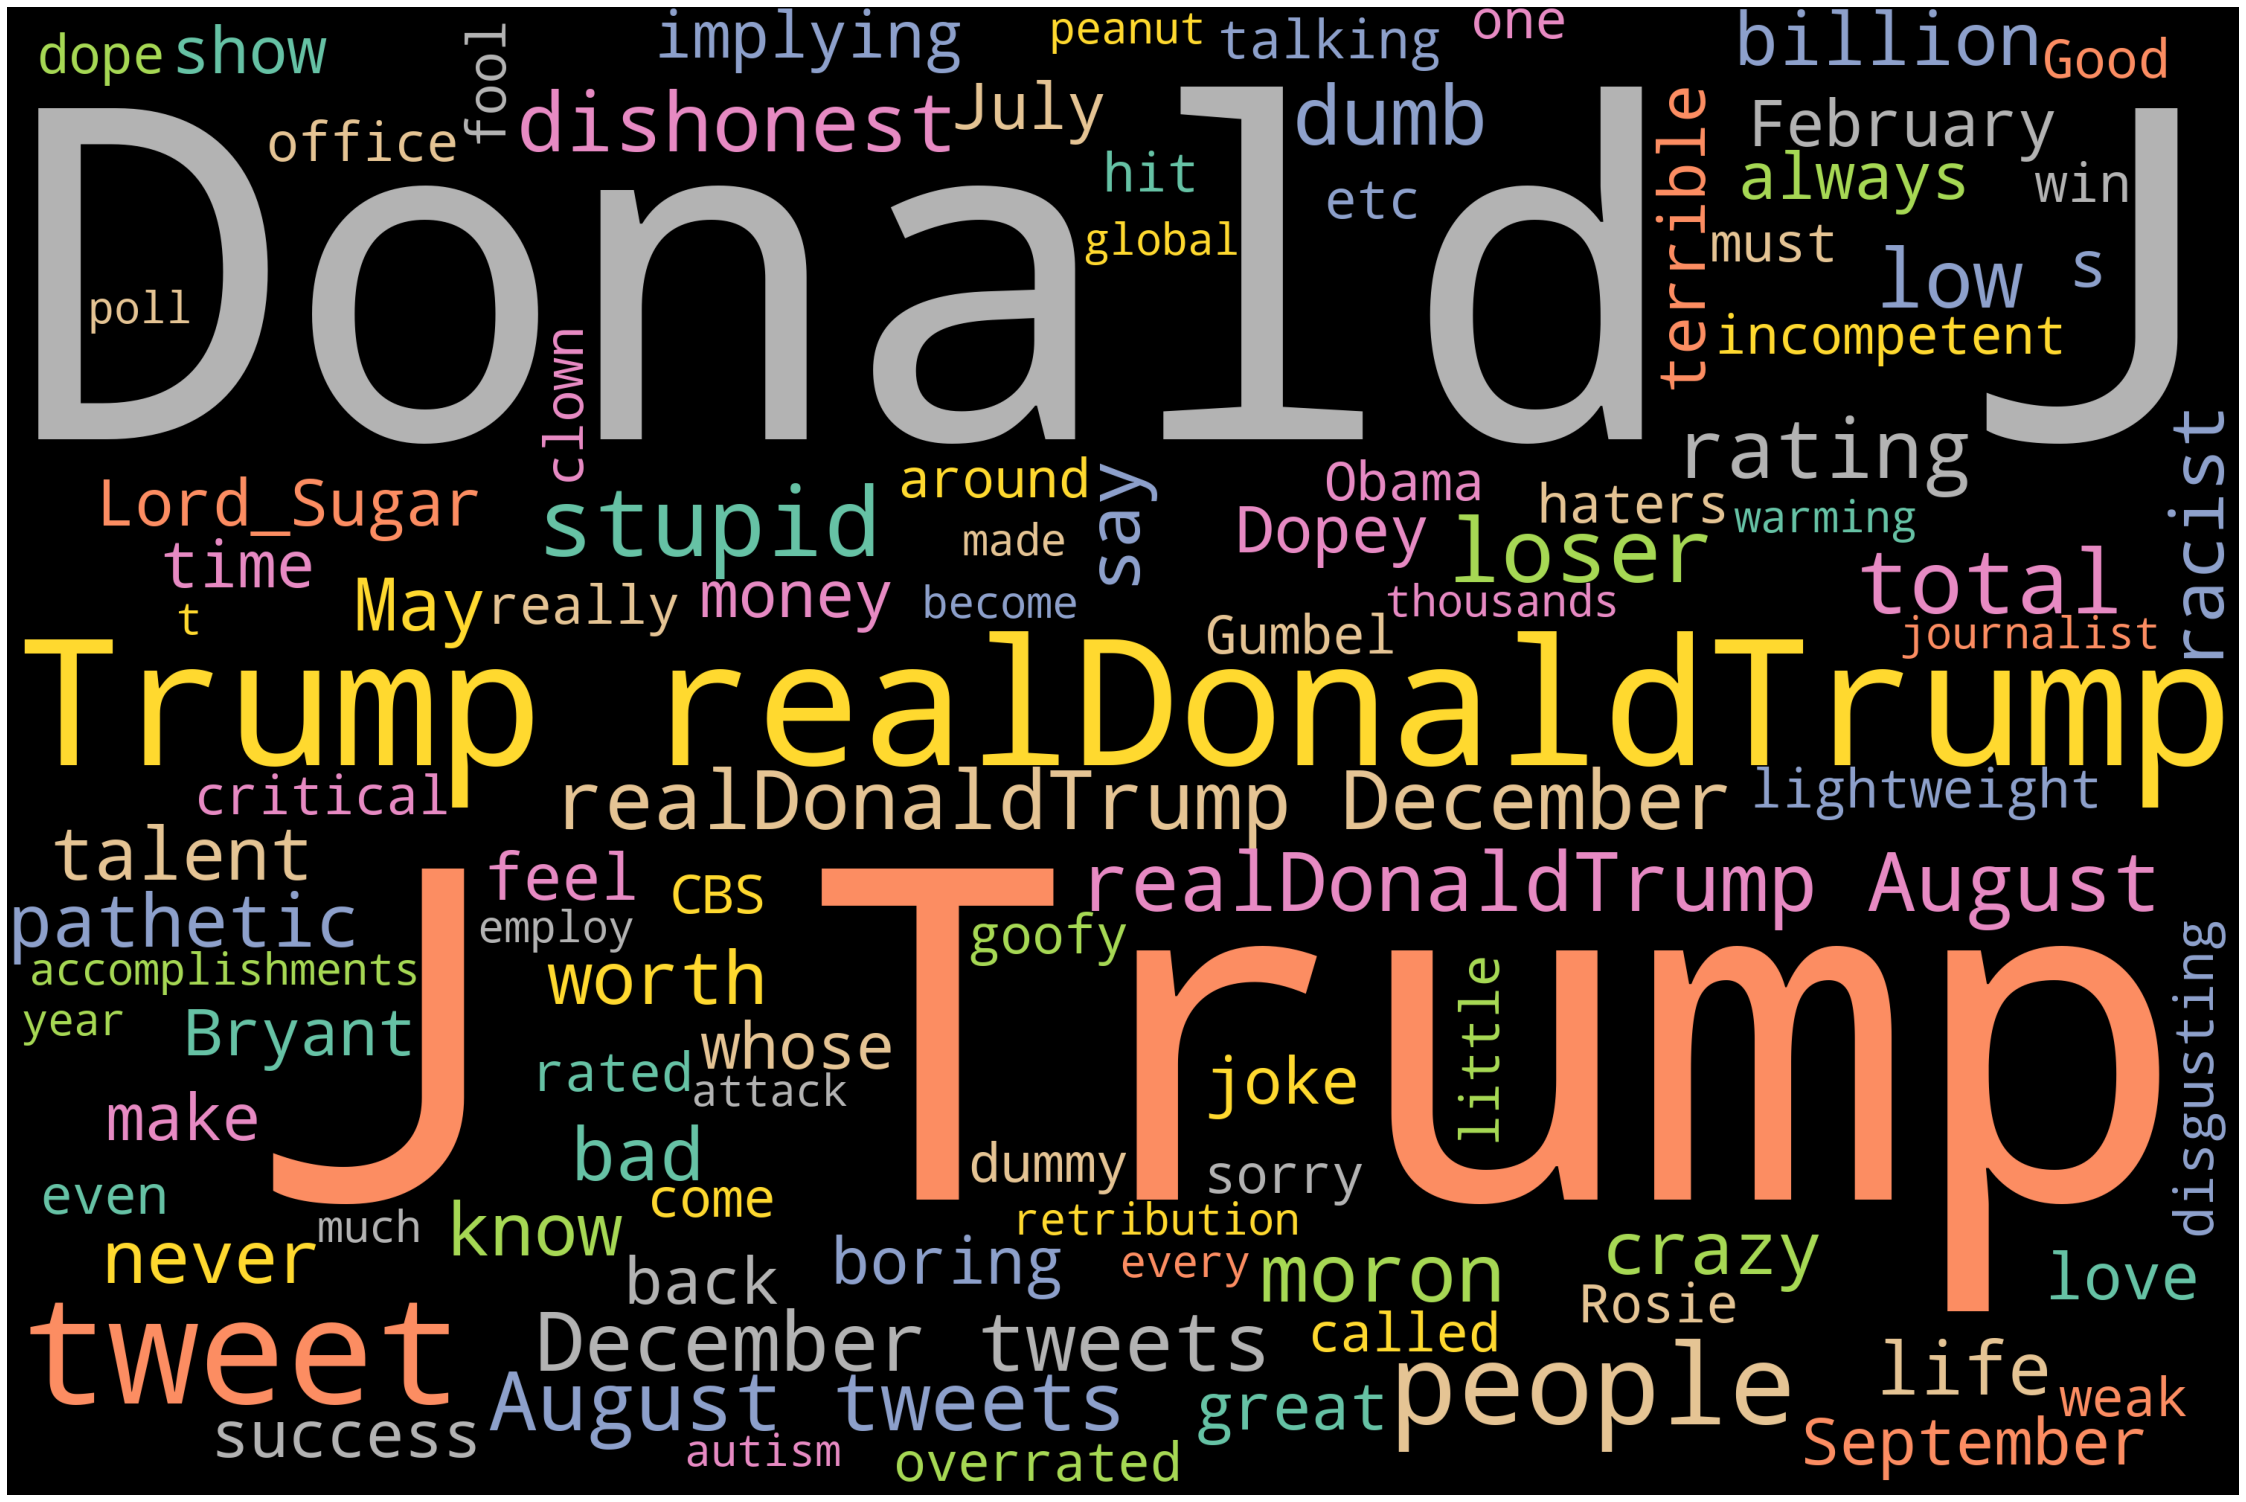

In [28]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)